### Importing all the libraries for handle the data set

In [6]:
import numpy as np
import pandas as pd
import re # for handle regular expressions
import random

### Reading the dataset

In [7]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

### Showing the data set obtained

In [12]:
print(recipes.head())

      cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0  vietnamese       0         0      0           0      0             0   
1  vietnamese       0         0      0           0      0             0   
2  vietnamese       0         0      0           0      0             0   
3  vietnamese       0         0      0           0      0             0   
4  vietnamese       0         0      0           0      0             0   

   apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0        0         0          0  ...        0            0           0   
1        0         0          0  ...        0            0           0   
2        0         0          0  ...        0            0           0   
3        0         0          0  ...        0            0           0   
4        0         0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0 

### Data preparation (fixing the values and missing data or in a bad format)

In [9]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

### Showing the dataset before the data preparation
we change the (yes/no) values for (1/0)

In [10]:
print(recipes.head())

      cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0  vietnamese       0         0      0           0      0             0   
1  vietnamese       0         0      0           0      0             0   
2  vietnamese       0         0      0           0      0             0   
3  vietnamese       0         0      0           0      0             0   
4  vietnamese       0         0      0           0      0             0   

   apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0        0         0          0  ...        0            0           0   
1        0         0          0  ...        0            0           0   
2        0         0          0  ...        0            0           0   
3        0         0          0  ...        0            0           0   
4        0         0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0 

# Modeling the recipes of ASIA and INDIA

### libraries for modeling data

In [15]:
%matplotlib inline
from sklearn import tree # model of the tree desicion
from sklearn.metrics import accuracy_score, confusion_matrix # to show the stats of the model
import matplotlib.pyplot as plt # to plot the model
import graphviz
from sklearn.tree import export_graphviz # to visualize the model
import itertools

In [18]:
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])] # to get all the recipes of that nacionality
cuisines = asian_indian_recipes["cuisine"] # labels of each record
ingredients = asian_indian_recipes.iloc[:,1:] # getting all the ingredients of each record

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")
print(f" shape of the ingredients of nacionality korean, japanese, chinese, tai and indian  {asian_indian_recipes.shape}")
print(f" shape of all the labels of each record {cuisines.shape}")
print(f" shape of all the ingredients of the data {ingredients.shape}")


Decision tree model saved to bamboo_tree!
 shape of the ingredients of nacionality korean, japanese, chinese, tai and indian  (2448, 384)
 shape of all the labels of each record (2448,)
 shape of all the ingredients of the data (2448, 383)


We can observe that the numbers of records its the same so its still consistent the inputs of the model

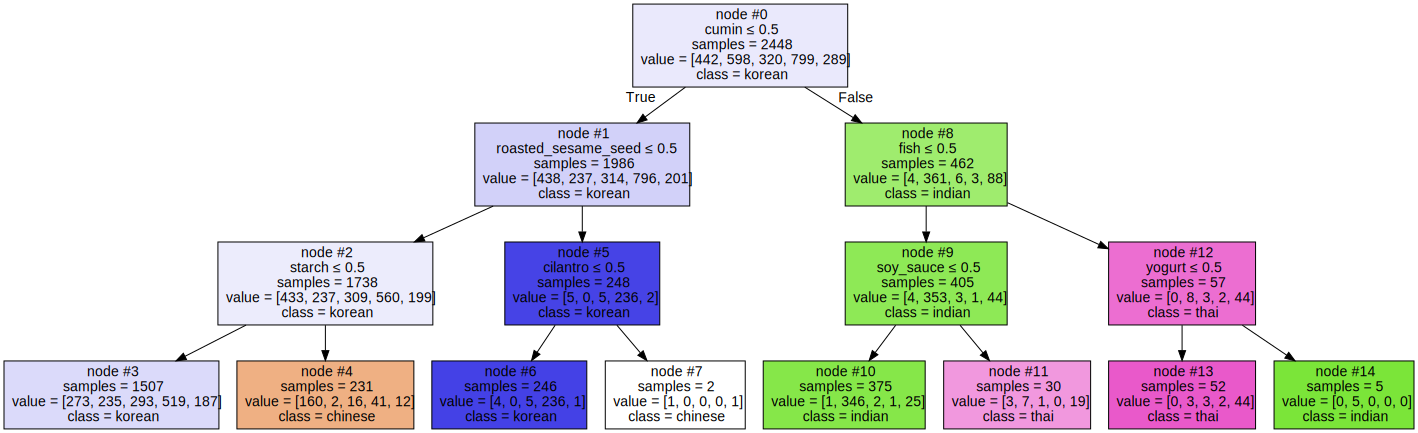

In [19]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

# falta de dividir el data set en datos de prueba y datos de entrenamiento